In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 1: Load dataset
df = pd.read_csv("../../data/cleaned_weather.csv", encoding='utf-8')

In [7]:
df.head()

,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),...,et0_fao_evapotranspiration (mm),latitude,longitude,elevation,year,month,day,sunrise_hour,sunset_hour,daylight_hours
0,0,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,38905.73,...,4.61,6.924429,79.90725,4,2010,1,1,6,18,12
1,0,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,37451.01,...,3.91,6.924429,79.90725,4,2010,2,1,6,18,12
2,0,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,33176.43,...,3.66,6.924429,79.90725,4,2010,3,1,6,18,12
3,0,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,38289.20,...,3.75,6.924429,79.90725,4,2010,4,1,6,18,12
4,0,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,39113.82,...,5.00,6.924429,79.90725,4,2010,5,1,6,18,12


In [8]:
# Step 2: Clean and rename columns
df.columns = df.columns.str.strip()  # strip whitespace
df.rename(columns={
    'temperature_2m_mean (°C)': 'temperature',
    'rain_sum (mm)': 'rainfall',
    'wind_speed_10m_max (km/h)': 'wind_speed',
    'precipitation_sum (mm)': 'precipitation'
}, inplace=True)

In [9]:
# Step 3: Create datetime column from year, month, day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [10]:
# Step 4: Basic info and missing data check
print("Dataframe info:")
print(df.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   location_id                      142371 non-null  int64         
 1   weather_code (wmo code)          142371 non-null  int64         
 2   temperature_2m_max (°C)          142371 non-null  float64       
 3   temperature_2m_min (°C)          142371 non-null  float64       
 4   temperature                      142371 non-null  float64       
 5   apparent_temperature_max (°C)    142371 non-null  float64       
 6   apparent_temperature_min (°C)    142371 non-null  float64       
 7   apparent_temperature_mean (°C)   142371 non-null  float64       
 8   daylight_duration (s)            142371 non-null  float64       
 9   sunshine_duration (s)            142371 non-null  float64       
 10  precipitation               

In [11]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
         location_id  weather_code (wmo code)  temperature_2m_max (°C)  \
count  142371.000000            142371.000000            142371.000000   
mean       13.000000                44.891586                29.295854   
min         0.000000                 0.000000                14.100000   
25%         6.000000                51.000000                27.700000   
50%        13.000000                53.000000                29.300000   
75%        20.000000                61.000000                31.300000   
max        26.000000                65.000000                40.300000   
std         7.788908                22.840879                 3.352774   

       temperature_2m_min (°C)    temperature  apparent_temperature_max (°C)  \
count            142371.000000  142371.000000                  142371.000000   
mean                 23.120601      25.730017                      33.560477   
min                   5.300000      12.100000                      11.0

In [12]:
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
location_id                        0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature                        0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation                      0
rainfall                           0
precipitation_hours (h)            0
wind_speed                         0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
latitude                           0
longitude                          0
elevation                          0
year                               0
month                              0
day                                0
sunrise_hour                       0
sunset_hour                        0
daylight_hours 

In [13]:
# Step 5: Identify categorical and numerical columns
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nCategorical features: {cat_features}")
print(f"Numerical features: {num_features}")


Categorical features: []
Numerical features: ['location_id', 'weather_code (wmo code)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'temperature', 'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)', 'daylight_duration (s)', 'sunshine_duration (s)', 'precipitation', 'rainfall', 'precipitation_hours (h)', 'wind_speed', 'wind_gusts_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)', 'latitude', 'longitude', 'elevation', 'year', 'month', 'day', 'sunrise_hour', 'sunset_hour', 'daylight_hours']


In [14]:
# Step 6: Variables to analyze
variables = ['temperature', 'rainfall', 'wind_speed', 'precipitation']
variables = [v for v in variables if v in df.columns]
if not variables:
    raise ValueError("None of the required variables found in the dataset!")

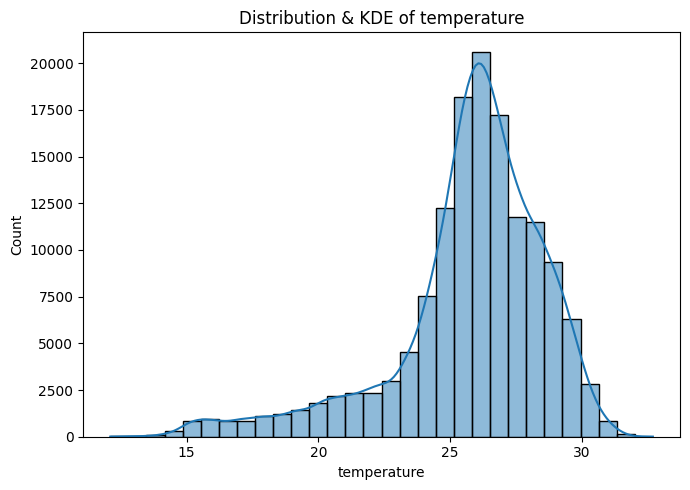

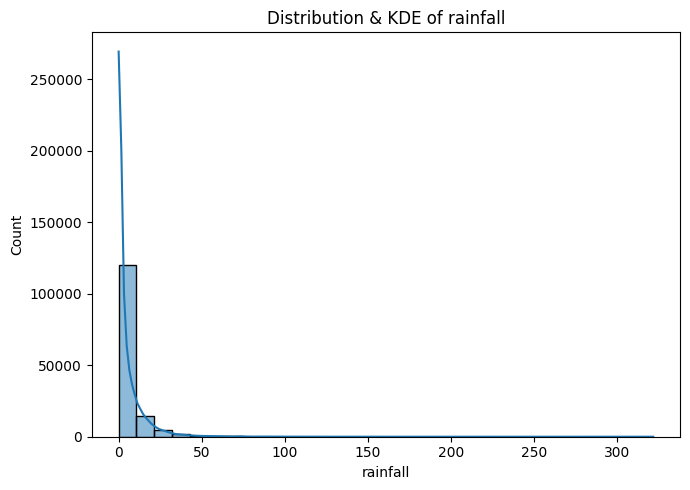

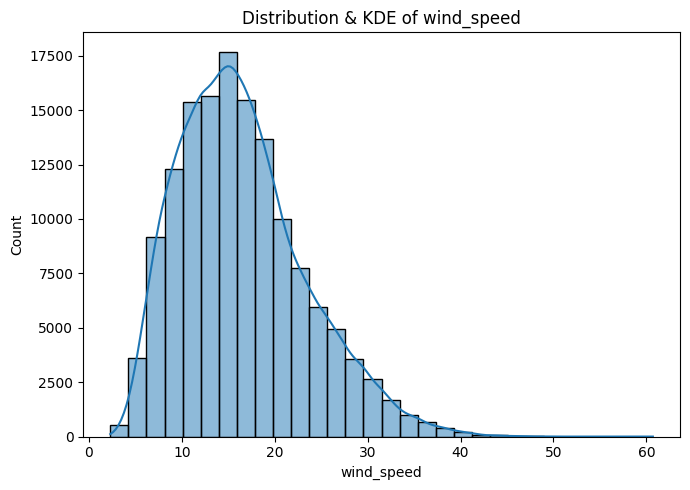

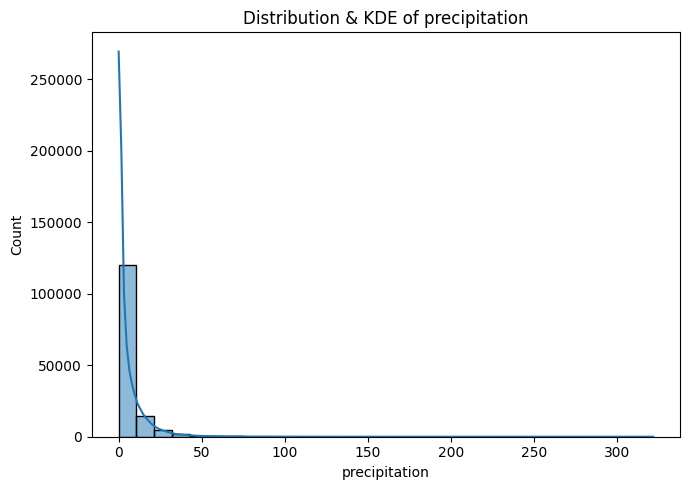

In [15]:
# Step 7: Distribution and KDE plots
for col in variables:
    plt.figure(figsize=(7, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution & KDE of {col}')
    plt.tight_layout()
    plt.show()

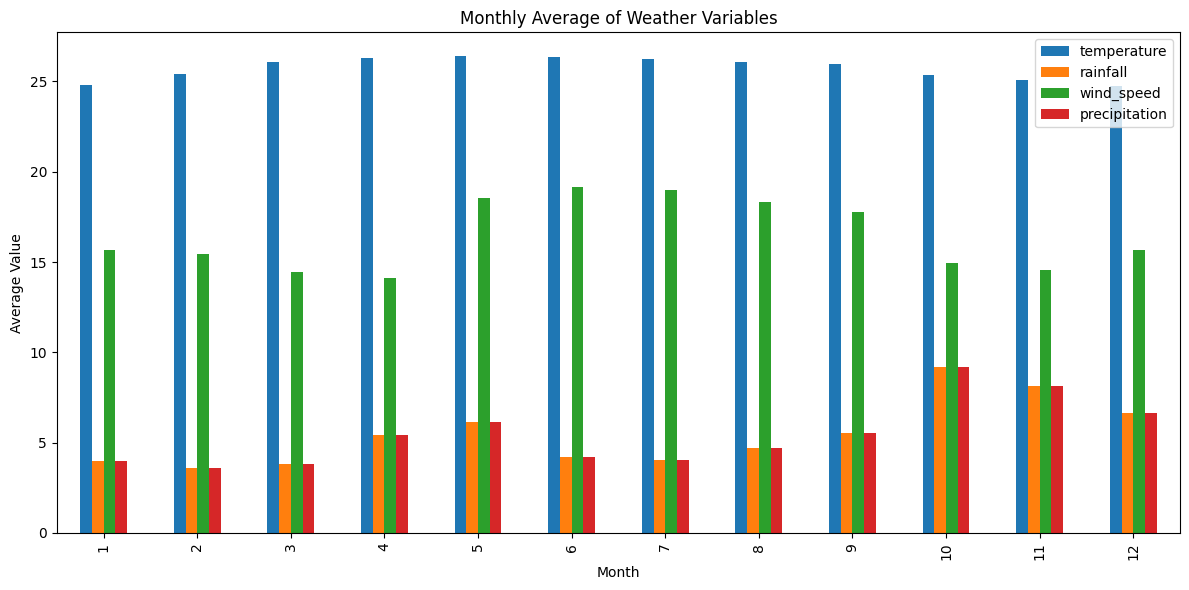

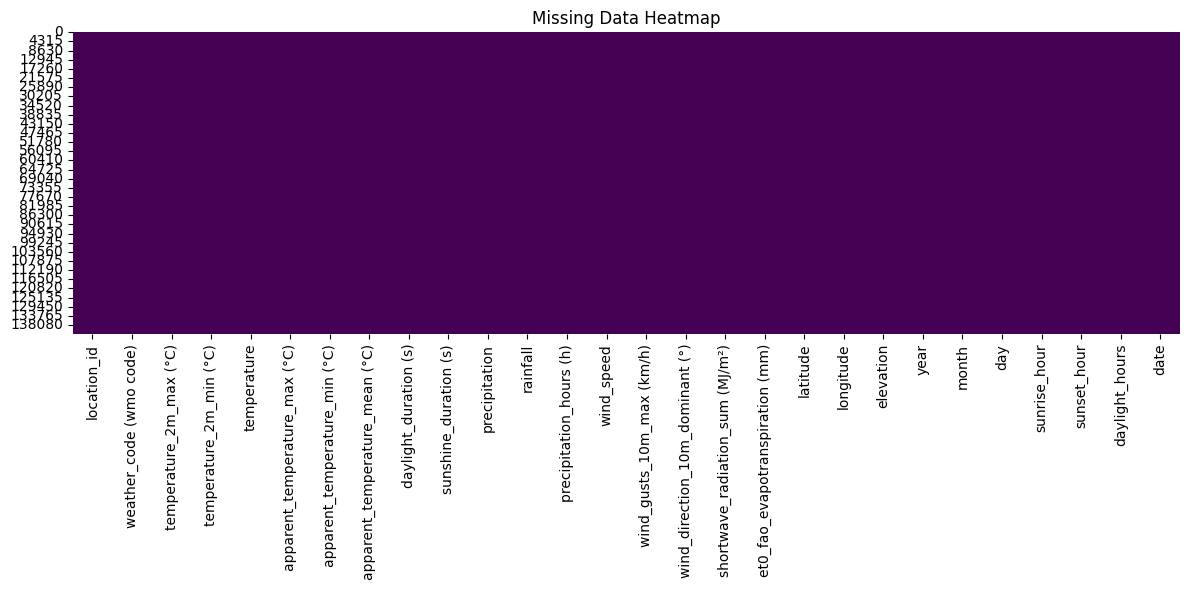

In [16]:
# Step 8: Monthly average trends for variable
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')[variables].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6), title="Monthly Average of Weather Variables")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

# === Step 9: Missing data heatmap ===
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.tight_layout()
plt.show()

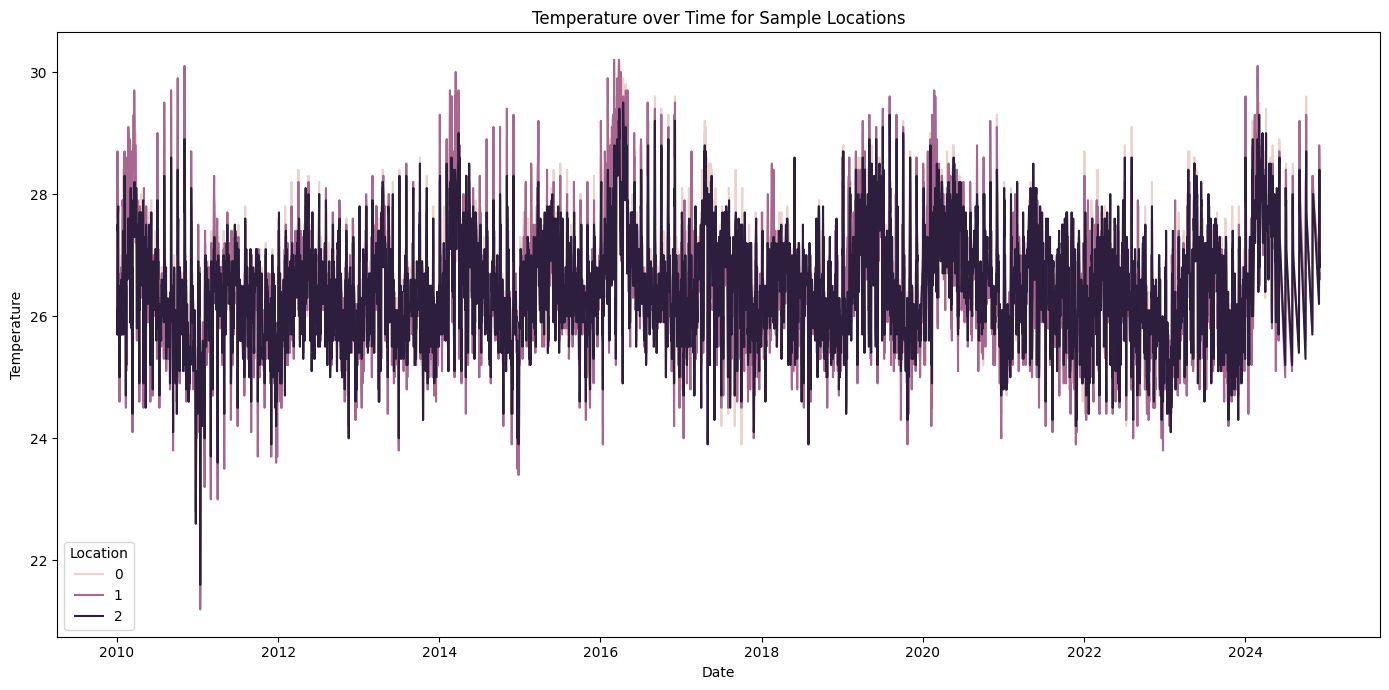

In [17]:
# Step 10: Multi-city temperature comparison (first 3 cities)
sample_cities = df['location_id'].unique()[:3]  # first 3 locations
df_sample = df[df['location_id'].isin(sample_cities)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sample, x='date', y='temperature', hue='location_id')
plt.title("Temperature over Time for Sample Locations")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend(title='Location')
plt.tight_layout()
plt.show()
